Topic: Challenge Set 1 Subject: Explore MTA turnstile data Date: 04/13/2018 Name: student name Worked with: other students' name Location: sea18_ds10/student_submissions/challenges/01-mta/shaikh_reshama/challenge_set_1_reshama.ipynb

In [333]:
import sys

In [334]:
# imports a library 'pandas', names it as 'pd'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

import pprint

# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline

import dateutil.parser
from datetime import *

In [335]:
# various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.precision', 3)

In [336]:
#read data from this folder
df1 = pd.read_csv('turnstile_171007.csv')
df2 = pd.read_csv('turnstile_170902.csv')
df3 = pd.read_csv('turnstile_171021.csv')

In [337]:
#Work with turnstile name as combo
def Col_Con(mta):
    mta['TURNSTILE'] = mta['C/A'] + mta['UNIT'] + mta['SCP']
    mta.drop('C/A', axis=1, inplace = True)
    mta.drop('UNIT', axis=1,inplace = True)
    mta.drop('SCP', axis=1, inplace = True)
    mta = mta.drop('LINENAME', axis=1)
    mta = mta.drop('DIVISION', axis=1)
    mta = mta.drop('DESC', axis=1)
    mta.columns = mta.columns.str.strip()
    return mta

In [338]:
mta1 = Col_Con(df1)
mta2 = Col_Con(df2)
mta3 = Col_Con(df3)

In [339]:
leng = len(mta1.index)

In [340]:
# make new columns, blank
#Only use if we are using turnstiles as data 'mta['Cu_ENT'] = [0] * leng'
def new_cols(mta):
    leng = len(mta.index)
    mta['ENT_COUNT'] = [0] * leng
    mta['EXT_COUNT'] = [0] * leng
    mta['DATE_TIME'] = [''] * leng
    return mta

In [341]:
mta1 = new_cols(mta1)
mta2 = new_cols(mta2)
mta3 = new_cols(mta3)

In [342]:
# Fill empty date time column with formula
# I dont think we will use this...
def date_time(df):
    week   = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
    for i in range(leng):
        datetime = df.DATE[i]+ ' ' + df.TIME[i]      
        value = dateutil.parser.parse(datetime)
        df.at[i,'DATE_TIME'] = value.weekday()
    return df

In [343]:
mta1 = date_time(mta1)
mta2 = date_time(mta2)
mta3 = date_time(mta3)

In [344]:
#fill empty ent_count with formula
def coun_ent(mta):
    for i in range(leng):
        if i == 0: 
            mta.at[i,'ENT_COUNT'] = 0
        else:
            if mta.TURNSTILE[i] == mta.TURNSTILE[i-1]:
                diff = mta.ENTRIES[i] - mta.ENTRIES[i-1]
                # ignore any negative entry count or very large entry counts, turnstile malfunction
                # we should discuss a better 
                if diff < 0: diff = 0
                if diff > 10000: diff = 0
                mta.at[i,'ENT_COUNT'] = diff
            else:
                mta.at[i,'ENT_COUNT'] = 0
    return mta

In [345]:
mta1 = coun_ent(mta1)
mta2 = coun_ent(mta2)
mta3 = coun_ent(mta3)

In [346]:
#fill in new exit counts
def coun_ext(mta):
    for i in range(leng):
        if i == 0: 
            mta.at[i,'EXT_COUNT'] = 0
        else:
            if mta.TURNSTILE[i] == mta.TURNSTILE[i-1]:
                diff = mta.EXITS[i] - mta.EXITS[i-1]
                # ignore any negative entry count or very large entry counts, turnstile malfunction
                # we should discuss a better 
                if diff < 0: diff = 0
                if diff > 10000: diff = 0
                mta.at[i,'EXT_COUNT'] = diff
            else:
                mta.at[i,'EXT_COUNT'] = 0
                
    return mta

In [347]:
mta1 = coun_ext(mta1)
mta2 = coun_ext(mta2)
mta3 = coun_ext(mta3)

In [348]:
def mor_cln(mta):   
    mta = mta.drop('TIME', axis=1)
    mta = mta.drop('ENTRIES', axis=1)
    mta = mta.drop('EXITS', axis=1)
    return mta

In [349]:
mta1 = mor_cln(mta1)
mta2 = mor_cln(mta2)
mta3 = mor_cln(mta3)

In [350]:
# Check all negative and large numbers have been removed

mta1.describe()
mta2.describe()
mta3.describe()

ENT_COUNT   EXT_COUNT
count  197912.000  197912.000
mean      183.690     139.994
std       274.758     237.477
min         0.000       0.000
25%         7.000       6.000
50%        73.000      51.000
75%       252.000     171.000
max      8934.000    4367.000

In [351]:
#tur_uni = mta.TURNSTILE.unique()

In [352]:
"""# Find some time of day trend?
turn = ''
date = ''
sum_ent = 0
cu_list = []
for i in range(leng):
    #Initialing complex if, goal is to have the cumulative for each day 
    if turn != mta.TURNSTILE[i] and i==0:
        turn = mta.TURNSTILE[i]
        date = mta.DATE[i]
        beg_in = i
        sum_ent= 0
    #if the turnstile and date are the same, sum up the ent_count
    elif (turn == mta.TURNSTILE[i] and date == mta.DATE[i]):
        sum_ent += mta['ENT_COUNT'][i]
    #if either the turnstile number changes, or the date changes, dump the sum of entries, 
    #and store in a new column across multpile indexes
    elif turn != mta.TURNSTILE[i] or date != df.DATE[i]:
        for j in range(i-beg_in):
            j +=beg_in
            mta.at[j, 'Cu_ENT'] = sum_ent 
        turn = mta.TURNSTILE[i]
        date = mta.DATE[i]
        beg_in = i
        sum_ent = mta['ENT_COUNT'][i]
mta"""

"# Find some time of day trend?\nturn = ''\ndate = ''\nsum_ent = 0\ncu_list = []\nfor i in range(leng):\n    #Initialing complex if, goal is to have the cumulative for each day \n    if turn != mta.TURNSTILE[i] and i==0:\n        turn = mta.TURNSTILE[i]\n        date = mta.DATE[i]\n        beg_in = i\n        sum_ent= 0\n    #if the turnstile and date are the same, sum up the ent_count\n    elif (turn == mta.TURNSTILE[i] and date == mta.DATE[i]):\n        sum_ent += mta['ENT_COUNT'][i]\n    #if either the turnstile number changes, or the date changes, dump the sum of entries, \n    #and store in a new column across multpile indexes\n    elif turn != mta.TURNSTILE[i] or date != df.DATE[i]:\n        for j in range(i-beg_in):\n            j +=beg_in\n            mta.at[j, 'Cu_ENT'] = sum_ent \n        turn = mta.TURNSTILE[i]\n        date = mta.DATE[i]\n        beg_in = i\n        sum_ent = mta['ENT_COUNT'][i]\nmta"

In [353]:
def merge_agg(ent_agg, ext_agg):
    ent_agg.columns = ent_agg.columns.droplevel(level=1)
    ext_agg.columns = ext_agg.columns.droplevel(level=1)
    #Creating a new data frame removing repeted values
    q_mta = pd.merge(ent_agg, ext_agg, on=['STATION','DATE_TIME'], how='left')
    return q_mta

In [354]:
def get_agg(mta):
    mt = mta.groupby(['STATION','DATE_TIME'])
    ent_agg = mt.agg({'ENT_COUNT':['sum']})
    ent_agg.reset_index(inplace=True)
    ext_agg = mt.agg({'EXT_COUNT':['sum']})
    #returns "index" as columns .reset_index()
    ext_agg.reset_index(inplace=True)
    fin_agg = merge_agg(ent_agg, ext_agg)
    return fin_agg

In [355]:
def get_agg_mean(mta):
    mt = mta.groupby(['STATION','DATE_TIME'])
    ent_agg = mt.agg({'ENT_COUNT':['mean']})
    ent_agg.reset_index(inplace=True)
    ext_agg = mt.agg({'EXT_COUNT':['mean']})
    #returns "index" as columns .reset_index()
    ext_agg.reset_index(inplace=True)
    fin_agg = merge_agg(ent_agg, ext_agg)
    return fin_agg

In [356]:
mta1 = get_agg(mta1)
mta2 = get_agg(mta2)
mta3 = get_agg(mta3)

In [357]:
def super_merge(a,b,c):
    new_df = pd.concat([a, b])
    q_mta = pd.concat([new_df, c])
    q_mta=get_agg_mean(q_mta)
    return q_mta
#, on=['STATION','DATE_TIME'], how='left'
#, on=['STATION','DATE_TIME'], how='left')

In [358]:
super_df = super_merge(mta1,mta2,mta3)
super_df

STATION DATE_TIME   ENT_COUNT  EXT_COUNT
0                1 AV         0   19619.333  21013.000
1                1 AV         1   20745.333  22036.667
2                1 AV         2   21399.000  22210.333
3                1 AV         3   21878.333  22537.000
4                1 AV         4   22500.667  23306.333
5                1 AV         5   12775.333  14304.333
6                1 AV         6   14727.000  16703.333
7              103 ST         0   30595.667  20186.000
8              103 ST         1   31955.000  21574.000
9              103 ST         2   32407.000  21819.000
10             103 ST         3   32384.667  21650.000
11             103 ST         4   31531.667  21262.333
12             103 ST         5   17596.333  11275.333
13             103 ST         6   16261.000  12028.667
14      103 ST-CORONA         0   19863.333  15289.333
15      103 ST-CORONA         1   20466.667  16341.000
16      103 ST-CORONA         2   20570.667  17073.667
17      103 ST-CORONA         3   20442.667  16367.000
18      103 ST-CORONA         4   20562.667  16877.333
19      103 ST-CORONA         5   13511.333  10158.333
20      103 ST-CORONA         6   11930.000  11418.333
21             104 ST         0    3069.333    769.000
22             104 ST         1    3126.667    904.667
23             104 ST         2    3133.333    863.667
24             104 ST         3    3165.333    877.000
25             104 ST         4    2974.000    836.667
26             104 ST         5    1386.333    385.000
27             104 ST         6    1125.000    407.667
28             110 ST         0   11295.667   8551.000
29             110 ST         1   11846.667   9243.333
30             110 ST         2   11929.667   9294.333
31             110 ST         3   12013.333   9345.667
32             110 ST         4   11986.000   9387.667
33             110 ST         5    5872.000   4663.667
34             110 ST         6    5336.333   4905.667
35             111 ST         0   17658.333   9713.333
36             111 ST         1   18013.000  10666.000
37             111 ST         2   17921.000  10501.000
38             111 ST         3   17931.000  10593.000
39             111 ST         4   17733.667  10335.667
40             111 ST         5   10853.333   6148.333
41             111 ST         6    9772.667   6757.667
42             116 ST         0   33583.667  16394.000
43             116 ST         1   34727.333  17210.000
44             116 ST         2   35272.667  17508.667
45             116 ST         3   35157.000  17440.000
46             116 ST         4   35096.333  17495.000
47             116 ST         5   19427.000   8827.667
48             116 ST         6   18622.333   9938.000
49    116 ST-COLUMBIA         0   15197.667   8401.000
50    116 ST-COLUMBIA         1   16452.333   8308.667
51    116 ST-COLUMBIA         2   16544.667   8566.667
52    116 ST-COLUMBIA         3   16891.000   8376.333
53    116 ST-COLUMBIA         4   16493.333   7624.333
54    116 ST-COLUMBIA         5    7754.667   3815.000
55    116 ST-COLUMBIA         6    7150.333   3834.000
56             121 ST         0    1041.000    635.000
57             121 ST         1    1062.667    647.667
58             121 ST         2    1055.333    640.000
59             121 ST         3    1043.000    649.667
60             121 ST         4    1040.667    644.667
61             121 ST         5     513.333    460.000
62             121 ST         6     433.333    418.667
63             125 ST         0   72965.000  58486.333
64             125 ST         1   75522.333  59999.667
65             125 ST         2   76412.333  61668.667
66             125 ST         3   75109.667  59652.333
67             125 ST         4   79486.333  65900.667
68             125 ST         5   43002.333  40285.667
69             125 ST         6   45004.667  42695.000
70             135 ST         0   20379.333   8704.667
71             135 ST         1   21283.333   9163.333

In [361]:
super_df.sort_values(by=['ENT_COUNT'], ascending = 0, inplace = True)
uni_stations = list(super_df.STATION.unique())[:30]
leng = len(super_df.index)
est_donors = []
for i in range(leng):
    est_donors.append(round(super_df['ENT_COUNT'][i]*.0005))
super_df['Donor Est.'] = est_donors

In [362]:
uni_df = super_df[super_df['STATION'].isin(uni_stations)]
uni_dt = super_df.DATE_TIME.unique()
print(uni_df)
uni_dt.sort()
uni_dt

              STATION DATE_TIME   ENT_COUNT   EXT_COUNT  Donor Est.
428    34 ST-PENN STA         1  165976.000  140119.333        10.0
429    34 ST-PENN STA         2  165522.333  138591.000        10.0
430    34 ST-PENN STA         3  164640.333  144113.000        11.0
427    34 ST-PENN STA         0  159817.333  131325.333        11.0
431    34 ST-PENN STA         4  158644.000  143575.000        11.0
1635  GRD CNTRL-42 ST         1  157206.000  146038.333         6.0
1636  GRD CNTRL-42 ST         2  152636.667  144512.667         7.0
1637  GRD CNTRL-42 ST         3  150894.000  143479.667        15.0
1634  GRD CNTRL-42 ST         0  144064.333  136375.333        16.0
1638  GRD CNTRL-42 ST         4  138646.333  133234.667        16.0
324             23 ST         2  124434.667   90544.333        16.0
323             23 ST         1  123395.667   90292.667        16.0
325             23 ST         3  122235.000   91130.333         9.0
415   34 ST-HERALD SQ         2  117260.667  112

TypeError: '<' not supported between instances of 'str' and 'int'

In [ ]:
# Next step! Combine days together and analyze what locations are the most popular and one what days
import seaborn as sns
import matplotlib.dates as mdates

# build the figure
#fig, ax = plt.subplots(figsize=(11,12))
#sns.barplot('DATE_TIME', 'ENT_COUNT', data=uni_df, hue='STATION', ax=ax)



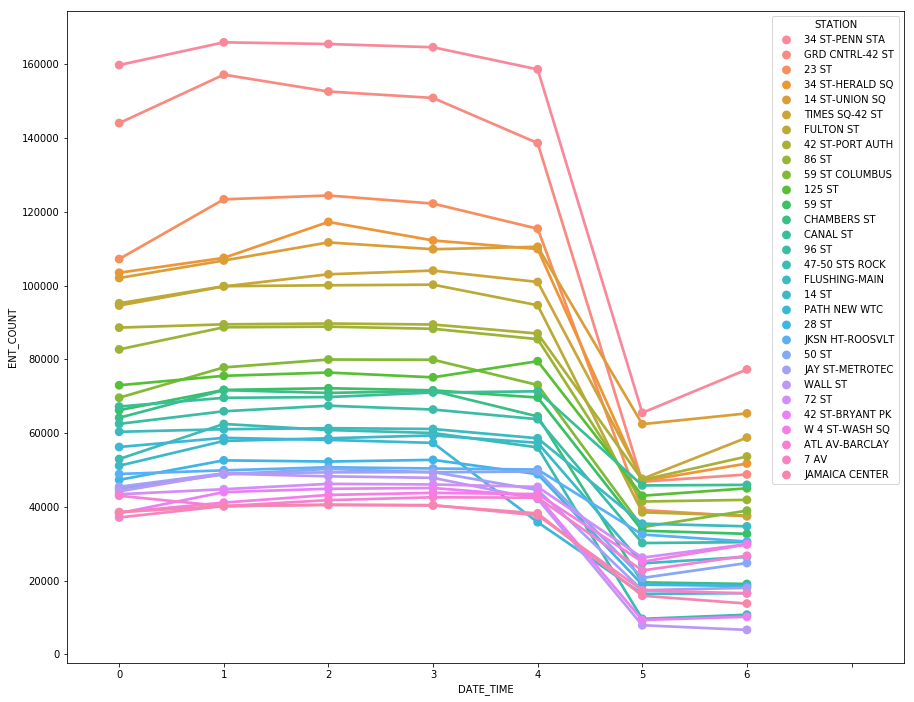

In [363]:
fig, ax = plt.subplots(figsize=(15,12))
sns.pointplot(y="ENT_COUNT", x="DATE_TIME", data=uni_df, join=True, hue='STATION', ax=ax, linestyles='-', order= uni_dt)

#### Challenge 1   
  
- Open up a new IPython notebook
- Download a few MTA turnstile data files
- Open up a file, use csv reader to read it, make a python dict where
  there is a key for each (C/A, UNIT, SCP, STATION). These are the
  first four columns. The value for this key should be a list of
  lists. Each list in the list is the rest of the columns in a
  row. For example, one key-value pair should look like


{    ('A002','R051','02-00-00','LEXINGTON AVE'):
[
['NQR456', 'BMT', '01/03/2015', '03:00:00', 'REGULAR', '0004945474', '0001675324'],
['NQR456', 'BMT', '01/03/2015', '07:00:00', 'REGULAR', '0004945478', '0001675333'],
['NQR456', 'BMT', '01/03/2015', '11:00:00', 'REGULAR', '0004945515', '0001675364'],
...
]
}

#### Challenge 2

- Let's turn this into a time series.

 For each key (basically the control area, unit, device address and
 station of a specific turnstile), have a list again, but let the list
 be comprised of just the point in time and the count of entries.

This basically means keeping only the date, time, and entries fields
in each list. You can convert the date and time into datetime objects
-- That is a python class that represents a point in time. You can
combine the date and time fields into a string and use the
[dateutil](https://labix.org/python-dateutil) module to convert it
into a datetime object. For an example check
[this StackOverflow question](http://stackoverflow.com/questions/23385003/attributeerror-when-using-import-dateutil-and-dateutil-parser-parse-but-no).

Your new dict should look something like

{    ('A002','R051','02-00-00','LEXINGTON AVE'):
[
[datetime.datetime(2013, 3, 2, 3, 0), 3788],
[datetime.datetime(2013, 3, 2, 7, 0), 2585],
[datetime.datetime(2013, 3, 2, 12, 0), 10653],
[datetime.datetime(2013, 3, 2, 17, 0), 11016],
[datetime.datetime(2013, 3, 2, 23, 0), 10666],
[datetime.datetime(2013, 3, 3, 3, 0), 10814],
[datetime.datetime(2013, 3, 3, 7, 0), 10229],
...
],
....
}



#### Challenge 3

- These counts are for every n hours. (What is n?) We want total daily
  entries.

Now make it that we again have the same keys, but now we have a single
value for a single day, which is the total number of passengers that
entered through this turnstile on this day.


#### Challenge 4

We will plot the daily time series for a turnstile.

In ipython notebook, add this to the beginning of your next cell:

    %matplotlib inline

This will make your matplotlib graphs integrate nicely with the
notebook. To plot the time series, import matplotlib with

    import matplotlib.pyplot as plt

Take the list of [(date1, count1), (date2, count2), ...], for the
turnstile and turn it into two lists:
dates and counts. This should plot it:

    plt.figure(figsize=(10,3))
    plt.plot(dates,counts)
    

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

#### Challenge 5

- So far we've been operating on a single turnstile level, let's
  combine turnstiles in the same ControlArea/Unit/Station combo. There
  are some ControlArea/Unit/Station groups that have a single
  turnstile, but most have multiple turnstilea-- same value for the
  C/A, UNIT and STATION columns, different values for the SCP column.

We want to combine the numbers together -- for each
ControlArea/UNIT/STATION combo, for each day, add the counts from each
turnstile belonging to that combo.

#### Challenge 6

Similarly, combine everything in each station, and come up with a time
series of `[(date1, count1),(date2,count2),...]` type of time series
for each STATION, by adding up all the turnstiles in a station.

#### Challenge 7

Plot the time series for a station.

#### Challenge 8

- Make one list of counts for **one** week for one station. Monday's
count, Tuesday's count, etc. so it's a list of 7 counts.
Make the same list for another week, and another week, and another
week.
`plt.plot(week_count_list)` for every `week_count_list` you created
this way. You should get a rainbow plot of weekly commute numbers on
top of each other.

#### Challenge 9

- Over multiple weeks, sum total ridership for each station and sort
  them, so you can find out the stations with the highest traffic
  during the time you investigate

#### Challenge 10

- Make a single list of these total ridership values and plot it with

    plt.hist(total_ridership_counts)

to get an idea about the distribution of total ridership among
different stations.

This should show you that most stations have a small traffic, and the
histogram bins for large traffic volumes have small bars.

*Additional Hint*:

If you want to see which stations take the meat of the traffic, you
can sort the total ridership counts and make a `plt.bar` graph. For
this, you want to have two lists: the indices of each bar, and the
values. The indices can just be `0,1,2,3,...`, so you can do

    indices = range(len(total_ridership_values))
    plt.bar(indices, total_ridership_values)